# 2º Trabalho de Aprendizagem Automática

Neste trabalho foi nos entregue o desafio de desenvolver modelos de modo a prever o tipo de cobertura florestal apartir de variaveis cartograficas. As áreas de estudo representam florestas com pertubrações minimas causadas pelo homem pelo que, os tipos de cobertura florestal existentes são o resultado de processos ecologicos.

1. **Tratamento de dados e amostras**
    1. Dados de Treino
    2. Dados de Teste
    2. Distribuição dos dados
    3. Correlações e Relações
    2. Divisão dos Conjuntos

2. **Afinação de Hiperparametros**
   1. Random Forrest Classifier
   2. Gradient Boosting Classifier
   3. MLP Classifier
   4. Logistic Regression
   5. KNNeighbors

3. **Melhores Modelos**
    1. Random Forrest 1
    2. Random Forrest 2

4. **Outros Modelos**
    1. Gradient Boosting Classifier
    2. MLP Classifier
    3. Logistic Regression
    4. KNNeigbhors

5. **Conclusão**

##### **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## **2. Tratamento de dados e amostras**

Nesta seção, procedemos a uma análise detalhada dos conjuntos de treino e teste. O primeiro passo foi realizar um **resumo estatistico** de modo a obtermos uma visão global das estatisticas basicas de cada variavel como **media,desvio-padrão,valores minimos e maximos** de modo a melhor comprendermos o tipo de dados com que estamos a lidar. Seguidamente realizarmos um estudo visual sobre as **correlações e distribuições** dos dados de modo a identificarmos as relações lineares entre as variaveis independentes que ajuda a detetar redundancias que podem vir a ser problematicas no desenvolvimento dos modelos.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
def describe_data(df):
    print("Tipos: ")
    print(df.dtypes)
    print("Linhas e Colunas: ")
    print(df.shape)
    print("Colunas: ")
    print(df.columns)
    print("Valores Vazios: ")
    print(df.apply(lambda x: sum(x.isnull()/len(df))))


#### **Dados de Treino**:
O conjunto de dados contém **10620 linhas e 14 colunas**, e **não possui valores ausentes**

---

**Análise das Variáveis**
 1. **id**
- **Descrição**: Identificador único para cada linha.
- **Distribuição**: Uniforme, com valores variando entre 1 e 10620.
- **Estatísticas**:
  - Média: 5310.5
  - Desvio padrão: 3065.87
  - Mínimo: 1
  - Máximo: 10620

 2. **elevacao**
- **Descrição**: Altitude do ponto.
- **Distribuição**: Concentrada entre 1879 e 3849.
- **Estatísticas**:
  - Média: 2752.12
  - Mediana: 2755
  - Desvio padrão: 417.88
  - Mínimo: 1879
  - Máximo: 3849

 3. **aspeto**
- **Descrição**: Orientação do terreno em graus.
- **Distribuição**: Varia entre 0 e 360 (azimute completo).
- **Estatísticas**:
  - Média: 156.57
  - Mediana: 125
  - Desvio padrão: 110.02
  - Mínimo: 0
  - Máximo: 360

 4. **inclinacao**
- **Descrição**: Inclinação do terreno em graus.
- **Distribuição**: Concentração predominante em valores baixos (0 a 52 graus).
- **Estatísticas**:
  - Média: 16.57
  - Mediana: 15
  - Desvio padrão: 8.48
  - Mínimo: 0
  - Máximo: 52

 5. **dh_agua**
- **Descrição**: Distância horizontal até o corpo de água mais próximo.
- **Distribuição**: Assimétrica, com maior concentração em valores baixos (até 500).
- **Estatísticas**:
  - Média: 228.43
  - Mediana: 180
  - Desvio padrão: 209.46
  - Mínimo: 0
  - Máximo: 1343

6. **dv_agua**
- **Descrição**: Diferença de altura (vertical) em relação ao corpo de água mais próximo.
- **Distribuição**: Predominância próxima de 0, com valores negativos ocasionais.
- **Estatísticas**:
  - Média: 51.81
  - Mediana: 33
  - Desvio padrão: 61.29
  - Mínimo: -134
  - Máximo: 554

 7. **dh_estrada**
- **Descrição**: Distância horizontal até a estrada mais próxima.
- **Distribuição**: Assimétrica, com maior densidade em valores baixos, mas estendendo-se até 6890.
- **Estatísticas**:
  - Média: 1723.08
  - Mediana: 1318
  - Desvio padrão: 1329.50
  - Mínimo: 0
  - Máximo: 6890

 8. **sombra_9, sombra_12 e sombra_15**
- **Descrição**: Quantidade de sombra às 9h, 12h e 15h.
- **Distribuição**: Valores variam entre 0 e 254, com maior concentração em valores intermediários.
- **Estatísticas (exemplo para sombra_9)**:
  - Média: 212.71
  - Mediana: 220
  - Desvio padrão: 30.61
  - Mínimo: 0
  - Máximo: 254

 9. **dh_Incendio**
- **Descrição**: Distância horizontal até o ponto de ignição de incêndios.
- **Distribuição**: Assimétrica, com valores entre 0 e 6853.
- **Estatísticas**:
  - Média: 1516.79
  - Mediana: 1260
  - Desvio padrão: 1111.75
  - Mínimo: 0
  - Máximo: 6853

 10. **area**
- **Descrição**: Classe de área.
- **Distribuição**: Valores discretos variando entre 1 e 4.
- **Estatísticas**:
  - Média: 2.2
  - Mediana: 2
  - Desvio padrão: 1.11
  - Mínimo: 1
  - Máximo: 4

11. **solo**
- **Descrição**: Tipo de solo.
- **Distribuição**: Discreta, com valores entre 1 e 21.
- **Estatísticas**:
  - Média: 9.7
  - Mediana: 11
  - Desvio padrão: 6.03
  - Mínimo: 1
  - Máximo: 21

12. **floresta**
- **Descrição**: Tipo de floresta.
- **Distribuição**: Discreta, variando entre 1 e 7.
- **Estatísticas**:
  - Média: 3.99
  - Mediana: 4
  - Desvio padrão: 2.0
  - Mínimo: 1
  - Máximo: 7


In [41]:
describe_data(train)
print(train.describe())
train.head()

Tipos: 
id             int64
elevacao       int64
aspeto         int64
inclinacao     int64
dh_agua        int64
dv_agua        int64
dh_estrada     int64
sombra_9       int64
sombra_12      int64
sombra_15      int64
dh_Incendio    int64
area           int64
solo           int64
floresta       int64
dtype: object
Linhas e Colunas: 
(10620, 14)
Colunas: 
Index(['id', 'elevacao', 'aspeto', 'inclinacao', 'dh_agua', 'dv_agua',
       'dh_estrada', 'sombra_9', 'sombra_12', 'sombra_15', 'dh_Incendio',
       'area', 'solo', 'floresta'],
      dtype='object')
Valores Vazios: 
id             0.0
elevacao       0.0
aspeto         0.0
inclinacao     0.0
dh_agua        0.0
dv_agua        0.0
dh_estrada     0.0
sombra_9       0.0
sombra_12      0.0
sombra_15      0.0
dh_Incendio    0.0
area           0.0
solo           0.0
floresta       0.0
dtype: float64
                 id      elevacao        aspeto    inclinacao      dh_agua  \
count  10620.000000  10620.000000  10620.000000  10620.000000  1

,id,elevacao,aspeto,inclinacao,dh_agua,dv_agua,dh_estrada,sombra_9,sombra_12,sombra_15,dh_Incendio,area,solo,floresta
0,1,2596,51,3,258,0,510,221,232,148,6279,4,5,6
1,2,2785,155,18,242,118,3090,238,238,122,6211,4,5,3
2,3,2579,132,6,300,-15,67,230,237,140,6031,4,5,3
3,4,2606,45,7,270,5,633,222,225,138,6256,4,5,6
4,5,2605,49,4,234,7,573,222,230,144,6228,4,5,6


#### **Dados de Teste**
O conjunto de dados contém **10620 linhas e 14 colunas**, e **não possui valores ausentes**.

---

**Análise das Variáveis**

**1. id**
- **Descrição**: Identificador único para cada linha.
- **Distribuição**: Uniforme, com valores variando entre 1 e 10620.
- **Estatísticas**:
  - Média: 5310.5
  - Desvio padrão: 3065.87
  - Mínimo: 1
  - Máximo: 10620

**2. elevacao**
- **Descrição**: Altitude do ponto.
- **Distribuição**: Concentrada entre 1879 e 3849 metros.
- **Estatísticas**:
  - Média: 2752.12
  - Mediana: 2755
  - Desvio padrão: 417.88
  - Mínimo: 1879
  - Máximo: 3849

**3. aspeto**
- **Descrição**: Orientação do terreno em graus.
- **Distribuição**: Varia entre 0 e 360 (azimute completo).
- **Estatísticas**:
  - Média: 156.57
  - Mediana: 125
  - Desvio padrão: 110.02
  - Mínimo: 0
  - Máximo: 360

**4. inclinacao**
- **Descrição**: Inclinação do terreno em graus.
- **Distribuição**: Concentração predominante em valores baixos (0 a 52 graus).
- **Estatísticas**:
  - Média: 16.57
  - Mediana: 15
  - Desvio padrão: 8.48
  - Mínimo: 0
  - Máximo: 52

**5. dh_agua**
- **Descrição**: Distância horizontal até o corpo de água mais próximo.
- **Distribuição**: Assimétrica, com maior concentração em valores baixos (até 500 metros).
- **Estatísticas**:
  - Média: 228.43
  - Mediana: 180
  - Desvio padrão: 209.46
  - Mínimo: 0
  - Máximo: 1343

**6. dv_agua**
- **Descrição**: Diferença de altura (vertical) em relação ao corpo de água mais próximo.
- **Distribuição**: Predominância próxima de 0, com valores negativos ocasionais.
- **Estatísticas**:
  - Média: 51.81
  - Mediana: 33
  - Desvio padrão: 61.29
  - Mínimo: -134
  - Máximo: 554

**7. dh_estrada**
- **Descrição**: Distância horizontal até a estrada mais próxima.
- **Distribuição**: Assimétrica, com maior densidade em valores baixos, mas estendendo-se até 6890 metros.
- **Estatísticas**:
  - Média: 1723.08
  - Mediana: 1318
  - Desvio padrão: 1329.50
  - Mínimo: 0
  - Máximo: 6890

**8. sombra_9, sombra_12 e sombra_15**
- **Descrição**: Quantidade de sombra às 9h, 12h e 15h.
- **Distribuição**: Valores variam entre 0 e 254, com maior concentração em valores intermediários.
- **Estatísticas (exemplo para sombra_9)**:
  - Média: 212.71
  - Mediana: 220
  - Desvio padrão: 30.61
  - Mínimo: 0
  - Máximo: 254

**9. dh_Incendio**
- **Descrição**: Distância horizontal até o ponto de ignição de incêndios.
- **Distribuição**: Assimétrica, com valores entre 0 e 6853 metros.
- **Estatísticas**:
  - Média: 1516.79
  - Mediana: 1260
  - Desvio padrão: 1111.75
  - Mínimo: 0
  - Máximo: 6853

**10. area**
- **Descrição**: Classe de área.
- **Distribuição**: Valores discretos variando entre 1 e 4.
- **Estatísticas**:
  - Média: 2.2
  - Mediana: 2
  - Desvio padrão: 1.11
  - Mínimo: 1
  - Máximo: 4

**11. solo**
- **Descrição**: Tipo de solo.
- **Distribuição**: Discreta, com valores entre 1 e 21.
- **Estatísticas**:
  - Média: 9.7
  - Mediana: 11
  - Desvio padrão: 6.03
  - Mínimo: 1
  - Máximo: 21


In [40]:
describe_data(test)
print(test.describe())
test.head()

Tipos: 
id             int64
elevacao       int64
aspeto         int64
inclinacao     int64
dh_agua        int64
dv_agua        int64
dh_estrada     int64
sombra_9       int64
sombra_12      int64
sombra_15      int64
dh_Incendio    int64
area           int64
solo           int64
dtype: object
Linhas e Colunas: 
(4500, 13)
Colunas: 
Index(['id', 'elevacao', 'aspeto', 'inclinacao', 'dh_agua', 'dv_agua',
       'dh_estrada', 'sombra_9', 'sombra_12', 'sombra_15', 'dh_Incendio',
       'area', 'solo'],
      dtype='object')
Valores Vazios: 
id             0.0
elevacao       0.0
aspeto         0.0
inclinacao     0.0
dh_agua        0.0
dv_agua        0.0
dh_estrada     0.0
sombra_9       0.0
sombra_12      0.0
sombra_15      0.0
dh_Incendio    0.0
area           0.0
solo           0.0
dtype: float64
                 id     elevacao       aspeto   inclinacao      dh_agua  \
count   4500.000000  4500.000000  4500.000000  4500.000000  4500.000000   
mean   12870.500000  2742.710667   156.916444

,id,elevacao,aspeto,inclinacao,dh_agua,dv_agua,dh_estrada,sombra_9,sombra_12,sombra_15,dh_Incendio,area,solo
0,10621,2703,330,27,30,17,3141,146,197,184,6186,4,7
1,10622,2524,94,7,212,-4,684,232,229,130,5474,4,18
2,10623,2536,99,6,234,0,659,230,232,136,5475,4,18
3,10624,2489,11,4,175,13,840,216,232,153,5254,4,18
4,10625,2493,63,10,127,20,840,229,221,124,5197,4,18


#### **Distribuição dos Dados**

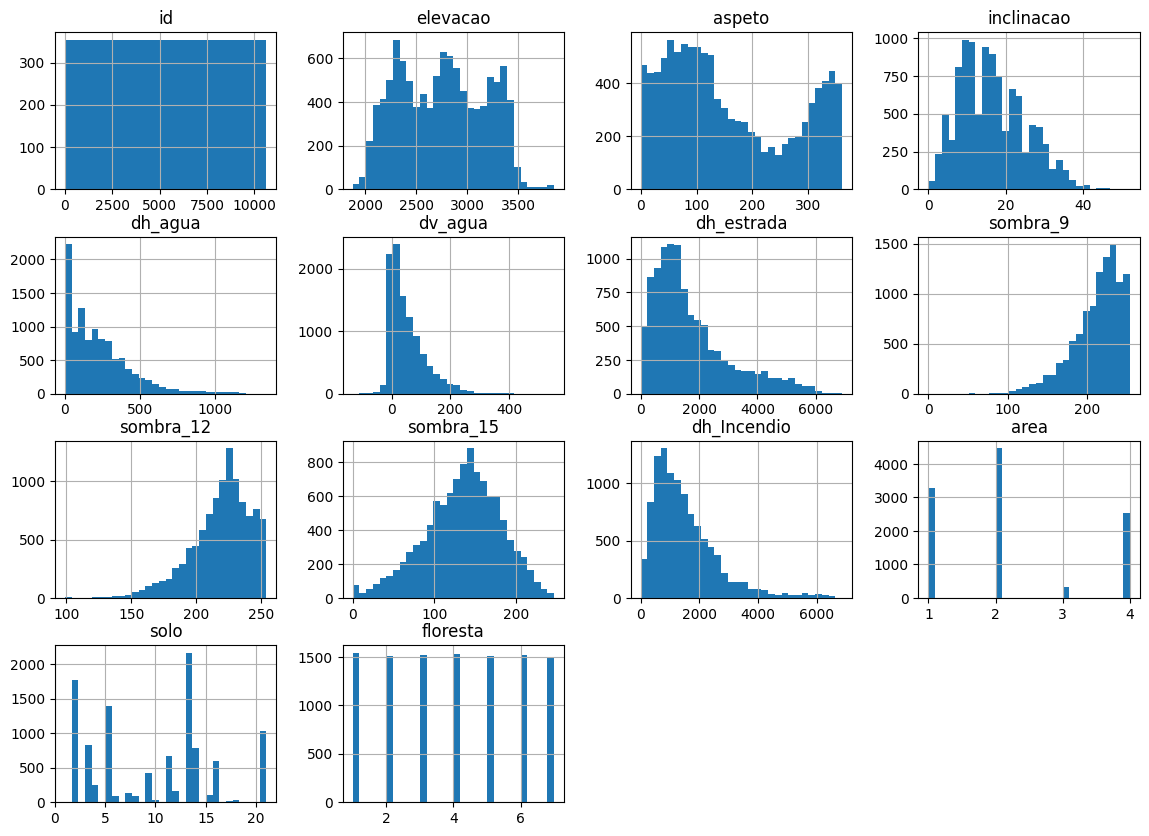

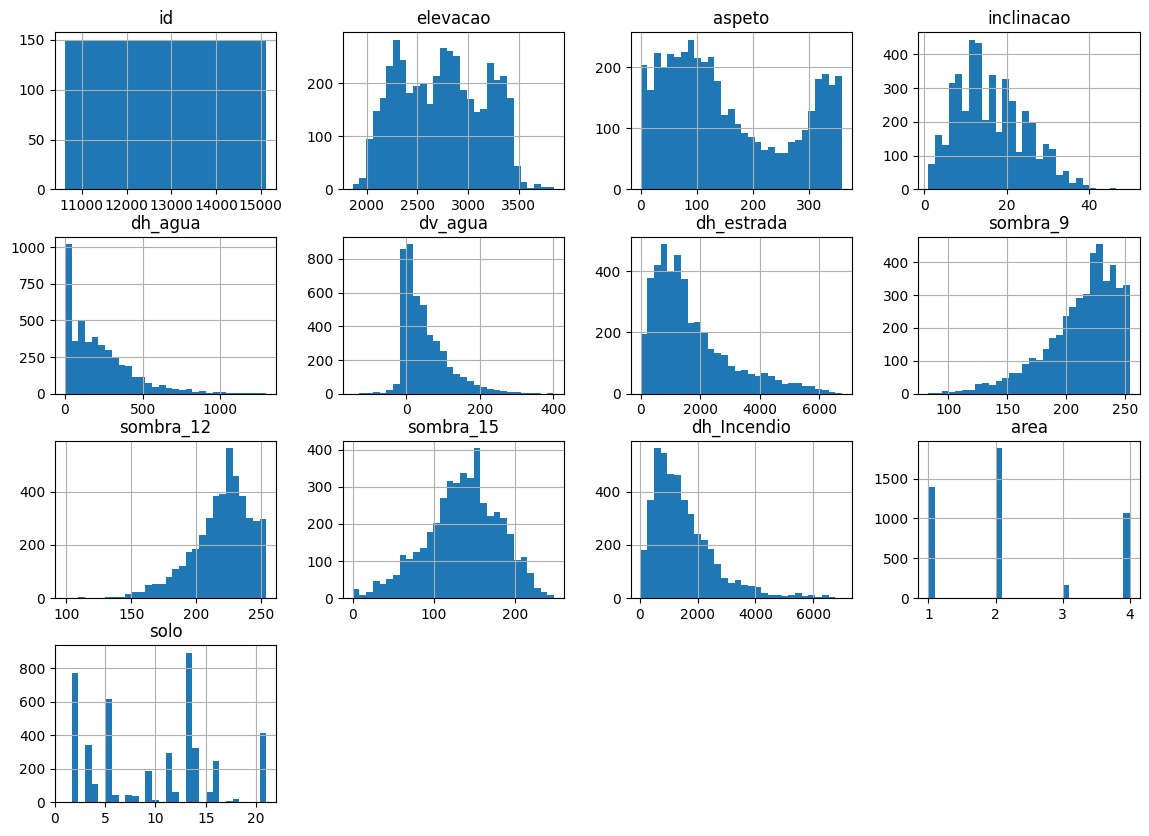

In [46]:
train.hist(bins=30,figsize=(14,10))
plt.title("Dados de Treino")
plt.show()
test.hist(bins=30,figsize=(14,10))
plt.title("Dados de Teste")
plt.show()

#### **Correlações e Relações**

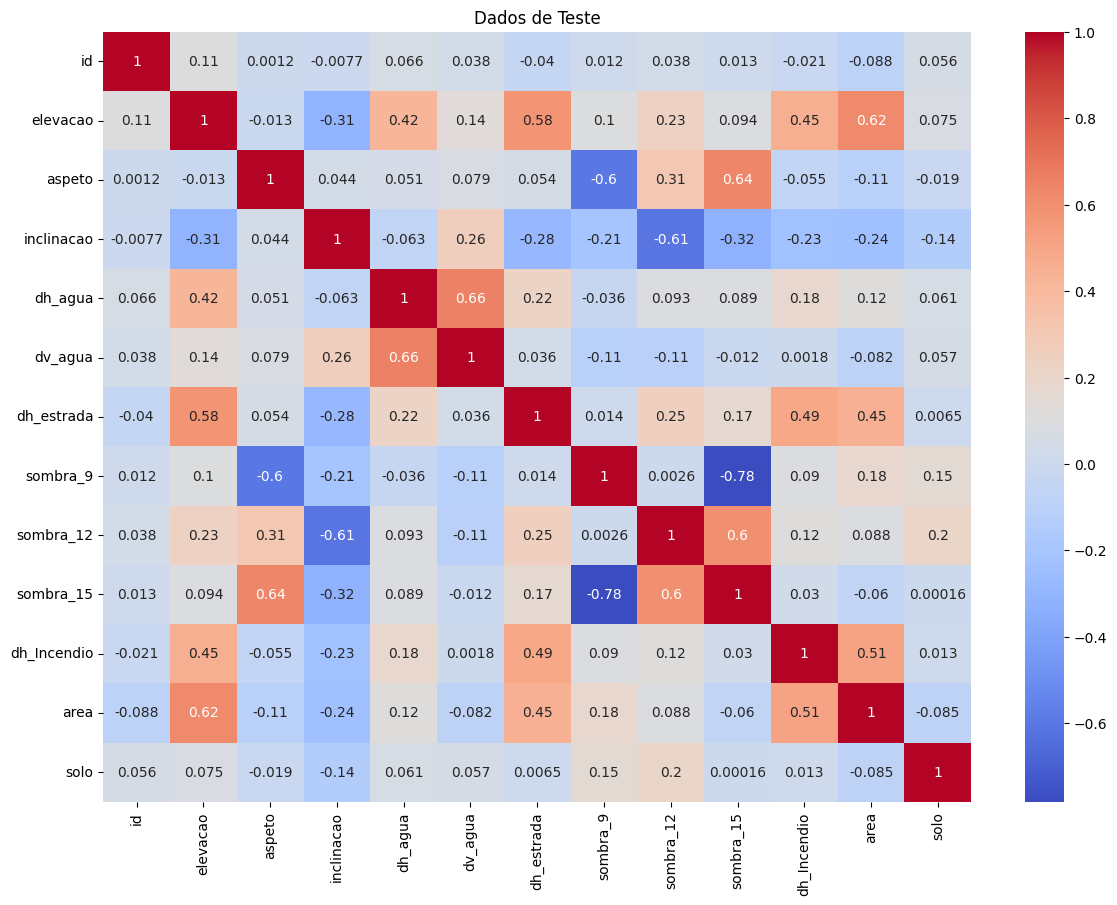

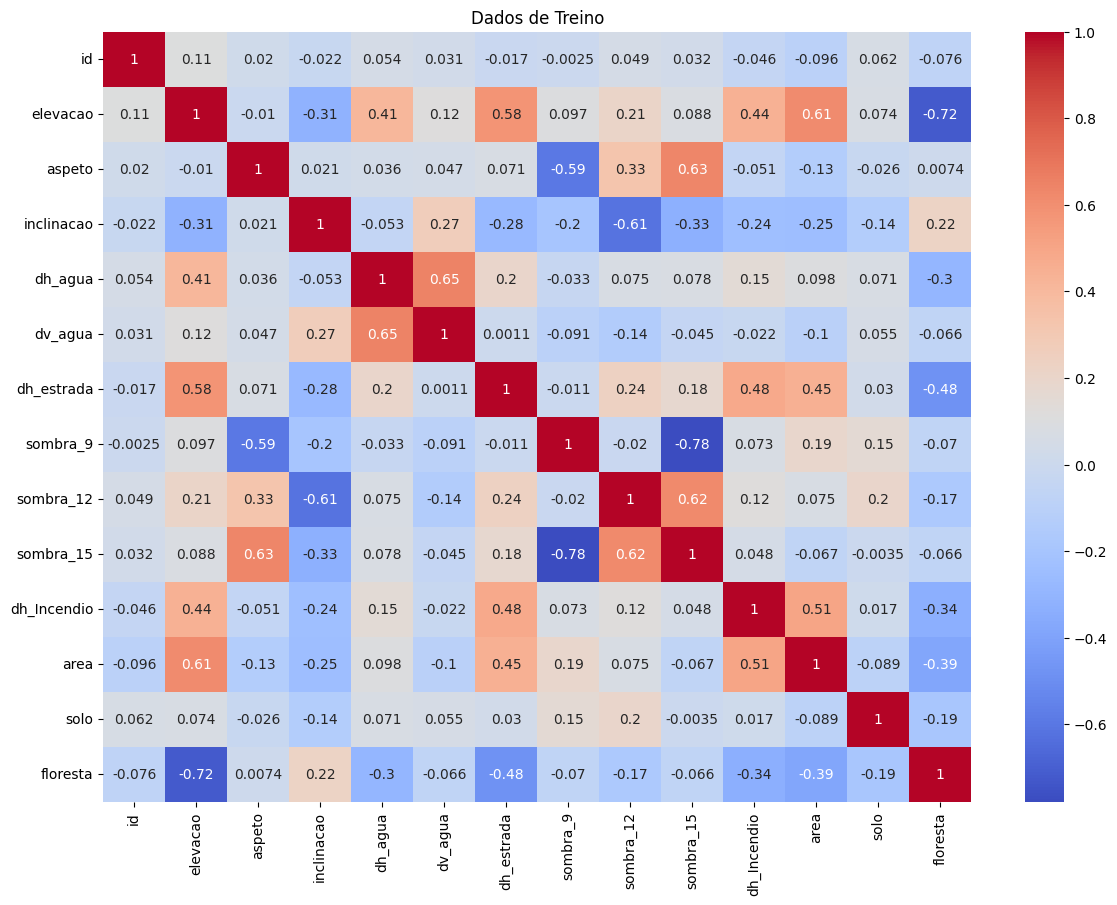

In [47]:
cor_matrix1 = test.corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor_matrix1,annot=True,cmap='coolwarm',)
plt.title("Dados de Teste")
plt.show()

cor_matrix2 = train.corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor_matrix2,annot=True,cmap='coolwarm')
plt.title("Dados de Treino")
plt.show()


#### **Divisão dos conjuntos**

In [ ]:
from sklearn.model_selection import train_test_split
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Conjunto de treino: {len(X_train)} amostras")
print(train.describe())

In [37]:

print(f"Conjunto de treino: {len(X_test)} amostras")
print(test.describe())

Conjunto de treino: 2124 amostras
                 id     elevacao       aspeto   inclinacao      dh_agua  \
count   4500.000000  4500.000000  4500.000000  4500.000000  4500.000000   
mean   12870.500000  2742.710667   156.916444    16.320222   224.292667   
std     1299.182435   417.168852   110.252212     8.385939   211.516397   
min    10621.000000  1863.000000     0.000000     1.000000     0.000000   
25%    11745.750000  2369.000000    66.000000    10.000000    60.000000   
50%    12870.500000  2742.000000   126.000000    15.000000   175.000000   
75%    13995.250000  3090.000000   261.000000    22.000000   324.000000   
max    15120.000000  3849.000000   359.000000    50.000000  1294.000000   

          dv_agua   dh_estrada     sombra_9    sombra_12    sombra_15  \
count  4500.00000  4500.000000  4500.000000  4500.000000  4500.000000   
mean     49.34800  1692.648667   212.690222   219.284667   135.629111   
std      61.08915  1314.440219    30.437151    22.415594    45.115982  

## **3. Afinação de hiperparametros**

Nesta secção podemos encontrar o processo de encontrar os melhores parametros para os varios modelos implementados. Recorremos ao metodo de **GridSearchCV** que permite uma automatização da busca dos melhores hiperparametros, **testando todas as combinações possiveis de hiperparametros**, garantindo **resultados mais robustos com menor risco de overfitting**.

Para todos os modelos a busca foi realizada com **5 folds** ou seja, dividindo o conjunto de treino em 5 partes com 4 dessas divisões utilizadas para treinar o modelo e a 5ª utilizada para validar o modelo. Tambem utilizamos a **verbose com um valor de 2** que permite monotorizar o progresso com mais informações disponiveis, e por fim utilizamos todos os cores disponiveis para executar o grid search com a definição do **n_jobs como -1**.


##### **Random Forrest Classifier** 
##### **Hiperparametros**
Os hiperparâmetros que serão ajustados no modelo de Random Forest estão definidos no dicionário param_grid. Estes incluem:

1. **n_estimators** : Numero de arvores na floresta.
2. **criterion** : Função de avaliação para dividir os nós da árvore.
3. **max_depth** : Profundidade máxima de cada arvore.
4. **min_samples_split** : Numero minimo de amostras necessario para dividir um nó.
5. **min_samples_leaf**: Numero minimo de amostras que um nó folha deve conter.
6. **max_features** : Numero maximo de atributos considerados para encontrar a melhor divisão.
7. **bootstrap** : Indica se será usada amostragem com reposição.
    

In [21]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators':[1500,2000,2500,3000,4500],
    'max_depth':[None],
    'max_leaf_nodes': [1000,1500,2000],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4]
}
rf_Model = RandomForestClassifier(random_state=42, bootstrap=True)

In [ ]:
rf_grid_search = GridSearchCV(
    estimator=rf_Model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)
print("Melhores Parametros: ", rf_grid_search.best_params_)
print("Melhor Exatidão: ",rf_grid_search.best_score_)

In [ ]:
results_df = pd.DataFrame(rf_grid_search.cv_results_)
top_results1 = results_df.sort_values(by='mean_test_score', ascending=False)
print(top_results1[['mean_test_score', 'params']].head(10))

heatmap_data1 = results_df.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score',
    aggfunc='mean'
    )
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data1, annot=True, cmap='viridis', fmt=".4f")
plt.title("HeatMap n_estimators x max_depth")
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

#### **Gradient Boosting Classifier**

##### **HiperParametros**

Os hiperparametros que serão ajustados para o Gradient Boosting Classifier estão definidos no dicionario **param_grid2** e são:

1. **learning_rate**: Taxa de aprendizagem que controla o peso atribuido a cada estimados.

2. **max_depth**: Profundidade máxima de cada arvore.

3. **max_features** : Numero maximo de features considerados para dividir um nó.

4. **min_samples_leaf**: Numero mínimo de amostras necessárias em uma folha.

5. **min_samples_split**: Numero minimo de amostras necessárias para dividir um nó.

6. **n_estimators**: Numero total de arvores no modelo.

7. **subsample**: Fração de amostras usadas para treinar cada arvore.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid2 = {
    'n_estimators':[500,1000,1500,2000],
    'max_depth':[10,20,None],
    'max_leaf_nodes':[50,100,100]
}
gbc_model = GradientBoostingClassifier()

In [ ]:
gbc_grid = GridSearchCV(
    estimator= gbc_model,
    param_grid=param_grid2,
    cv=5,
    verbose=2,
    n_jobs=-1,
    
)
gbc_grid.fit(X_train,y_train)
print("Melhor Parametros: ", gbc_grid.best_params_)
print("Melhor Exatidão: ", gbc_grid.best_score_)

In [ ]:

results_df_GBC = pd.DataFrame(gbc_grid.cv_results_)
top_results2 = results_df_GBC.sort_values(by='mean_test_score', ascending=False)
print(top_results2[['mean_test_score', 'params']].head(10))
heatmap_data2 = results_df_GBC.pivot_table(
    index='parm_learning_rate',
    columns='param_n_estimators',
    values='mean_test_score'
)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data1, annot=True, cmap='viridis', fmt=".4f")
plt.title("HeatMap n_estimators x learning_rate")
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()


#### **MLP Classifier**

##### **Hiperparâmetros**
Os hiperparametros que serão afinados para MLP estão definidos no dicionario **param_grid3** e são: 

1. **hidden_layer_sizes**: Define o número de neurons em cada hidden layer.
2. **learning_rate_init**: Especifica a taxa de aprendizagem inicial para o otimizador.
3. **learning_rate**: Determina como a taxa de aprendizagem será ajustada ao longo do treino.
4. **validation_fraction**: Proporção de dados de treino reservados para validação interna.
5. **n_iter_no_changes** : Numero maximo de iterações consecutivas sem melhorias na validação.



In [23]:
from sklearn.neural_network import MLPClassifier

param_grid3 = {
    'hidden_layer_sizes': [(150, 100, 50), (200, 100, 50), (200,200), (300,150,100)],
    'learning_rate_init': [0.001, 0.0001, 0.01],
    'learning_rate': ['adaptive'],
    'validation_fraction': [0.1]
}
mlpc_model = MLPClassifier(random_state=42,activation='relu',solver='adam',alpha=0.1,)

In [ ]:
mlp_grid = GridSearchCV(
    estimator=mlpc_model,
    param_grid=param_grid3,
    cv=5,
    verbose=3,
    n_jobs=-1,
)
mlp_grid.fit(X_train, y_train)
print("Melhores Parametros: ", mlp_grid.best_params_)
print("Melhor Exatidão: ", mlp_grid.best_score_)

In [ ]:
results_df_MLP = pd.DataFrame(mlp_grid.cv_results_)
top_results3 = results_df_MLP.sort_values(by='mean_test_score' , ascending=False)
print(top_results3[['mean_test_score', 'params']].head(10))
heatmap_data3 = results_df_MLP.pivot_table(
    index='parm_hidden_layer_sizes',
    columns='param_learning_rate',
    values='mean_test_score'
)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data1, annot=True, cmap='viridis', fmt=".4f")
plt.title("HeatMap hidden_layer_sizes x learning_rate")
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

#### **Logistic Regression**

#### **Hiperparametros**

Os hiperparametros encontram se definidos no dicionario **param_grid4** e são:

1. **C** : Controlador da regularização no modelo
2. **penalty**: Tipo de penalidade usado
3. **solver**: Define o algoritmo para otimizar o modelo
4. **class_weight**: Trata do balanceamento das classes 

In [24]:
from sklearn.linear_model import LogisticRegression
param_grid4 = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 500, 1000],
    'classifier__class_weight': [None, 'balanced']
}
LR_model = LogisticRegression()

In [ ]:
lr_grid = GridSearchCV(
    LR_model,
    param_grid=param_grid4,
    cv=5,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1,
)
lr_grid.fit(X_train, y_train)
print("Melhores Parametros: ", lr_grid.best_params_)
print("Melhor Exatidão: ", lr_grid.best_score_)

In [ ]:
results_df_LR = pd.DataFrame(lr_grid.cv_results_)
top_results4= results_df_LR.sort_values(by='mean_test_score', ascending=False)
print(top_results4[['mean_test_score', 'params']].head(10))
heatmap_data4= results_df_LR.pivot_table(
    index='param_classifier_C',
    columns='params_classifier_penalty',
    values='mean_test_score'
)
sns.heatmap(heatmap_data4,annot=True,cmap='viridis', fmt=".4f")
plt.title("Heatmap C x penalty")
plt.xlabel("Classifer C")
plt.ylabel("Classifier penalty")
plt.show()

#### **KNN**

##### **Hiperparametros**

Os parametros encontram se definidos dentro do dicionario **param_grid5** e são:

1. **n_neighbors**: Numero de vizinhos mais proximos a serem considerados pelo classificador
2. **weights**: Controla a forma como os vizinhos mais proximos contribuem para a classificação de um novo ponto
3. **algorithm**: Define o algoritmo para calcular os vizinhos mais proximos
4. **leaf_size** : Parametro apenas contablizado nos algoritmos de **ball_tree** e **kd_tree**
5. **p**: Determina a distancia usada para medir a distancia entre pontos

In [25]:
from sklearn.neighbors import KNeighborsClassifier
param_grid5 = {
    'n_neighbors': [1, 3, 5, 10, 20, 50],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50, 100],
    'p': [1, 2],
}
KNN_model = KNeighborsClassifier()

In [ ]:
knn_grid = GridSearchCV(
    estimator=KNN_model,
    param_grid=param_grid5,
    cv=5,
    verbose=3,
    n_jobs=-1,
)
knn_grid.fit(X_train, y_train)
print("Melhores Parametros: ", knn_grid.best_params_)
print("Melhor Exatidão: ", knn_grid.best_score_)

In [ ]:
results_df_KNN = pd.DataFrame(knn_grid.cv_results_)
top_results5= results_df_KNN.sort_values(by='mean_test_score', ascending=False)
print(top_results5[['mean_test_score', 'params']].head(10))
heatmap_data5= results_df_KNN.pivot_table(
    index='param_n_neighbors',
    columns='params_metric',
    values='mean_test_score'
)
sns.heatmap(heatmap_data4,annot=True,cmap='viridis', fmt=".4f")
plt.title("Heatmap Neighbors x metric")
plt.xlabel("Neighbors")
plt.ylabel("Metric")
plt.show()

## **4. Melhores Modelos**

Nesta secção encontra se analises dos dois modelos que obteram a melhor classificação no desafio do Kaggle.
Ambos utilizam o Random Forrest Model.

No primeiro modelo obtemos uma classificação de 86.663 na parte publica e 85.791 na parte privada, no segundo modelo obtemos uma classificação de 85.73 na parte publica e de 85.109 na parte privada.

#### **RandomForrest 1** 

##### **Analise do Modelo**
---

**Desempenho global**:
   
O modelo apresenta uma exatidão global de **87%**, refletindo um **desempenho consistente**. Esta conclusão é suportada pela análise das métricas:  
- **Macro-média**: uma **precisão de 86%**, um **recall de 87%** e um **F1-score de 86%**.  
- **Média ponderada**: tanto a precisão como o recall e o F1-score têm um valor de **87%**.  

Estas métricas sugerem que o modelo lida razoavelmente bem com o equilíbrio entre as classes, embora as classes com maior número de exemplos tenham maior impacto no resultado final.  



**Analise por classe**:
 -  **Classe 1**:  
  O modelo apresenta um desempenho excelente nesta classe, com poucos erros. No entanto, a análise da matriz de confusão revela que **7 amostras foram incorretamente classificadas como Classe 2** e **1 como Classe 3**. A confusão recorrente com a Classe 2 pode indicar uma **leve sobreposição nas características dessas classes**.  

-   **Classe 2**:  
  Esta é uma das classes com maior número de confusões, especialmente com a **Classe 3**, o que pode indicar que ambas possuem **características similares** ou que o modelo não está a capturar adequadamente as diferenças entre elas.  

-   **Classe 3**:  
  A Classe 3 apresenta o menor **recall (70%)** entre todas as classes, indicando que o modelo está a falhar em identificar corretamente muitos exemplos reais desta classe. A maior confusão ocorre com a **Classe 2 (59 exemplos)**, o que reforça a necessidade de melhorar a separação entre estas classes.  

-   **Classe 4**:  
  O desempenho nesta classe é sólido, embora existam confusões significativas com a **Classe 7**, sugerindo que estas classes têm **características sobrepostas**.  

-   **Classe 5**:  
  A Classe 5 apresenta um desempenho excelente, com **poucas confusões** registadas.  

- **Classe 6**:  
  Desempenho muito bom, com **confusões pontuais**, principalmente com a **Classe 3 (9 exemplos)**.  

- **Classe 7**:  
  O modelo apresenta um **bom desempenho geral**, mas ainda assim existem **confusões notáveis com a Classe 4 (24 exemplos)**.  

---

    
De forma geral, o modelo demonstra um **bom desempenho** na classificação do dataset, mas a **confusão entre classes** é uma das principais limitações, especialmente entre a **Classe 2 e Classe 3**.


In [33]:
RF1 = RandomForestClassifier(
    n_estimators=5800,
    max_depth=None,
    max_leaf_nodes=2500,
    random_state=42,
    criterion='entropy',
    bootstrap=False,
    class_weight="balanced_subsample",
    n_jobs=-1
    
)
RF1.fit(X_train,y_train)
y_pred = RF1.predict(X_test)


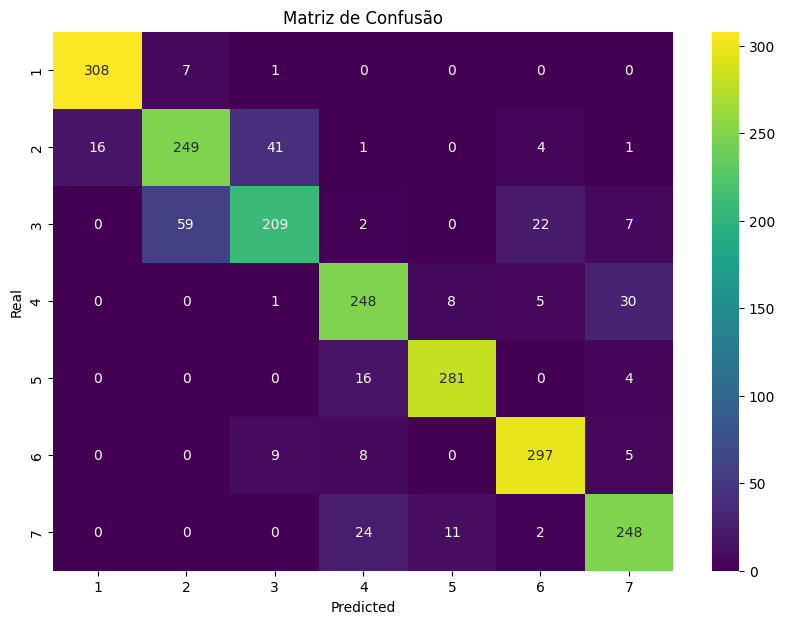

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       316
           2       0.79      0.80      0.79       312
           3       0.80      0.70      0.75       299
           4       0.83      0.85      0.84       292
           5       0.94      0.93      0.94       301
           6       0.90      0.93      0.92       319
           7       0.84      0.87      0.86       285

    accuracy                           0.87      2124
   macro avg       0.86      0.87      0.86      2124
weighted avg       0.87      0.87      0.87      2124

Exatidão: 0.8663
Taxa de Erro: 0.1337


In [34]:
cm1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm1, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print(classification_report(y_test,y_pred))
RF1_acc = accuracy_score(y_test,y_pred)
error_rateRF = 1-RF1_acc
print(f"Exatidão: {RF1_acc:.4f}")
print(f"Taxa de Erro: {error_rateRF:.4f}")

#### **Random Forrest 2**

##### **Analise do Modelo**
---

**Desempenho Global**

O modelo apresenta uma exatidão global de **85,73%**, refletindo um **bom desempenho geral**. Esta conclusão é suportada pelas métricas:  
- **Macro-média**: uma **precisão de 85%**, um **recall de 86%** e um **F1-score de 85%**.  
- **Média ponderada**: tanto a precisão como o recall e o F1-score têm um valor de **86%**.

Estes valor indicam que o modelo apresenta um desempenho consistente entre classes, embora ocorra uma representação desequilibrada entre classes, com as classes com maior numero de exemplos tendo um maior impacto.

**Analise de Classes**
- **Classe 1**:  
  A Classe 1 apresenta o melhor desempenho global. No entanto, foram registados alguns erros de classificação, sendo **8 exemplos classificados como Classe 2** e **1 como Classe 3**.  

- **Classe 2**:  
  Existem confusões significativas com a **Classe 3 (36 exemplos)**, o que pode indicar que as características destas classes são muito semelhantes ou que o modelo não está a capturar corretamente as diferenças entre elas.  

- **Classe 3**:  
  A Classe 3 apresenta o menor **recall** entre todas as classes, com **notáveis confusões com a Classe 2 (56 exemplos)**. Isto sugere que o modelo não está a identificar corretamente muitos exemplos reais desta classe.  

- **Classe 4**:  
  O desempenho nesta classe é sólido, embora existam algumas confusões recorrentes com a **Classe 7 (35 exemplos)**.  

- **Classe 5**:  
  Esta classe apresenta um desempenho excelente, com **poucos erros registados**.  

- **Classe 6**:  
  Embora o desempenho geral da classe seja bom, ocorreram **confusões pontuais com a Classe 3 (11 exemplos)**.  

- **Classe 7**:  
  O modelo apresenta **confusões frequentes desta classe com a Classe 4 (24 exemplos)**.  

---

Em suma, o modelo apresenta um **bom desempenho** contudo apresenta graves falhas na classificação de classes que diminui o desempenho geral do modelo.

In [35]:
RF2 = RandomForestClassifier(
    n_estimators=4500,
    max_depth=None,
    max_leaf_nodes=1000,
    random_state=42,
    criterion='entropy',
    bootstrap=True,
    class_weight="balanced_subsample",
    n_jobs=-1
)
RF2.fit(X_train,y_train)
y_predrf2 = RF2.predict(X_test)

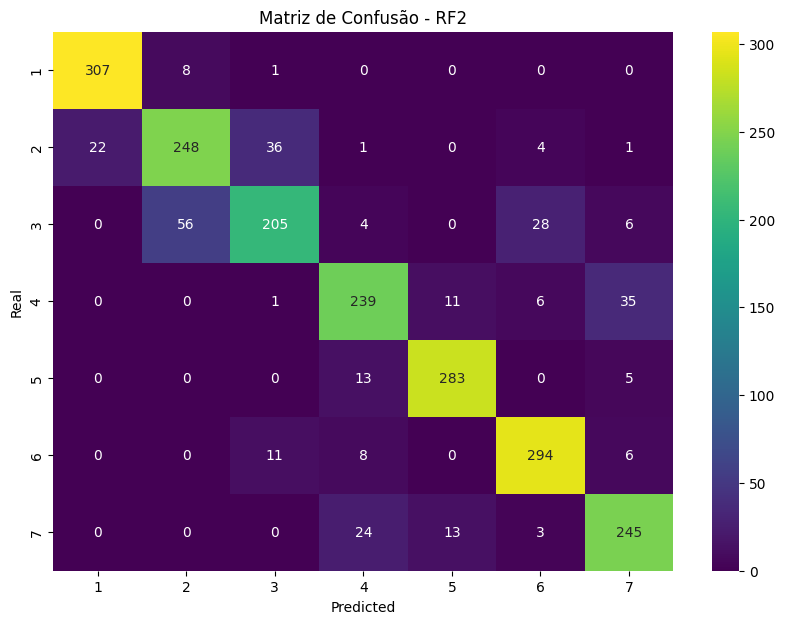

              precision    recall  f1-score   support

           1       0.93      0.97      0.95       316
           2       0.79      0.79      0.79       312
           3       0.81      0.69      0.74       299
           4       0.83      0.82      0.82       292
           5       0.92      0.94      0.93       301
           6       0.88      0.92      0.90       319
           7       0.82      0.86      0.84       285

    accuracy                           0.86      2124
   macro avg       0.85      0.86      0.85      2124
weighted avg       0.86      0.86      0.86      2124

Exatidão: 0.8573
Taxa de Erro: 0.1427


In [36]:
cm_RF2 = confusion_matrix(y_test, y_predrf2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_RF2, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Matriz de Confusão - RF2')
plt.show()

print(classification_report(y_test, y_predrf2))
RF2_acc = accuracy_score(y_test, y_predrf2)
error_rate_RF2 = 1 - RF2_acc
print(f"Exatidão: {RF2_acc:.4f}")
print(f"Taxa de Erro: {error_rate_RF2:.4f}")

## **5. Outros Modelos**

Nesta secção encontramos os modelos que apesar de não obterem uma classificação tão notavel como os dois anteriores tambem foram utilizados no decorrer da realização do trabalho.

##### **Modelo Gradient Boosting**

In [ ]:
GBC = GradientBoostingClassifier(
    n_estimators=2000,
    learning_rate=0.1,
    max_depth=3,
    )
GBC.fit(X_train, y_train)
y_pred2 = GBC.predict(X_test)
print(classification_report(y_test,y_pred2))
gbc_acc = accuracy_score(y_test,y_pred2)
print(gbc_acc)


#### **Logistic Regression**

In [ ]:
LR = LogisticRegression(
    C= 100, 
    class_weight= None,
    max_iter= 100,
    penalty="l1",
    solver= 'saga'
)
LR.fit(X_train,y_train)
y_pred3 = LR.predict(X_test)
print(classification_report(y_test,y_pred3))
lr_acc= accuracy_score(y_test,y_pred3)
print(lr_acc)

##### **Modelo MLP**

In [ ]:
MLP = MLPClassifier(
   hidden_layer_sizes=(300,),
   activation='relu',
   solver='adam',
   learning_rate_init=0.1,
   max_iter=2000
)
MLP.fit(X_train,y_train)
y_pred4 = MLP.predict(X_test)
print(classification_report(y_test,y_pred4))
mlp_acc= accuracy_score(y_test,y_pred4)
print(mlp_acc)

##### **Modelo KNN**

In [ ]:
KNN = KNeighborsClassifier(
    n_neighbors=10,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None
)

KNN.fit(X_train, y_train)
y_pred5 = KNN.predict(X_test)
print(classification_report(y_test,y_pred5))
knn_acc = accuracy_score(y_test,y_pred5)
print(knn_acc)

## **6. Conclusão**

Após uma análise detalhada dos dados e a realização de um pré-processamento cuidadoso, foi possível explorar as variáveis e compreender as suas distribuições e correlações, o que ajudou a identificar as características mais relevantes para a construção do modelo. Durante o processo de modelagem, foram avaliados diversos algoritmos de classificação e, após a afinação de parâmetros, o modelo Random Forest revelou-se o mais adequado para este conjunto de dados.

A escolha do Random Forest foi validada pelos bons resultados observados nas métricas de avaliação, como precisão, recall e F1-score, que apresentaram um desempenho superior em comparação com outros modelos testados. Este algoritmo mostrou-se robusto ao lidar com a complexidade e diversidade do conjunto de dados, conseguindo captar as relações entre as variáveis e, ao mesmo tempo, fornecer uma boa capacidade de generalização.

## **Criação do ficheiro de submissão**

##### **Random Forrest**

In [238]:
ids_for_test = test['id']
submissao = pd.DataFrame({
    "id": ids_for_test,
    "floresta": y_pred
})
submissao.to_csv('submissao12.csv', index=False)



##### **GBC**

In [44]:
ids_for_test = test['id']
submissaoGBC = pd.DataFrame({
    "id": ids_for_test,
    "floresta": y_pred2
})
submissaoGBC.to_csv('submissaoGBC3.csv',index=False)

##### **MLP**

In [ ]:
ids_for_test = test['id']
submissaoMLP = pd.DataFrame({
    "id": ids_for_test,
    "floresta": y_pred3
})
submissaoMLP.to_csv('submissaoMLP1.csv', index=False)